# Predicting insurance costs given the set of attributes in this data set using an extra-trees regressor model.

#### Features (Data Dictionary):
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

#### Target:
- charges: Individual medical costs billed by health insurance

#### We will use an "extra-trees regressor" in this project.
- This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

#### Import necessary tools.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
import warnings
warnings.filterwarnings('ignore')
from itertools import cycle, islice

#### Load and peek at the data.

In [2]:
df = pd.read_csv('insurance.csv')
df.head().append(df.tail())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


#### Check for null values.

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### No nulls!

#### Let's print some general descriptors of the data in each feature.

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Let's look at the unique values in each column.

In [5]:
for col in df:
    print(col)
    print(df[col].unique())
    print()

age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]

sex
['female' 'male']

bmi
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 

#### And let's peek at the correlations between each of the features.

In [6]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#### Now let's visualize those correlations in a heatmap.

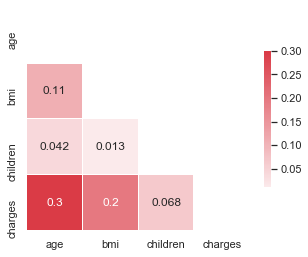

In [7]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True)

#### All of the features have acceptably small correlations with each other.
#### Age and BMI have by far the highest correlations with our target variable, charges.

#### First, we need to convert the bmi to integer values.

In [8]:
df['bmi_int'] = df['bmi'].apply(lambda x: int(x))

#### Let's look at the distribution of the data now.

Data distribution analysis


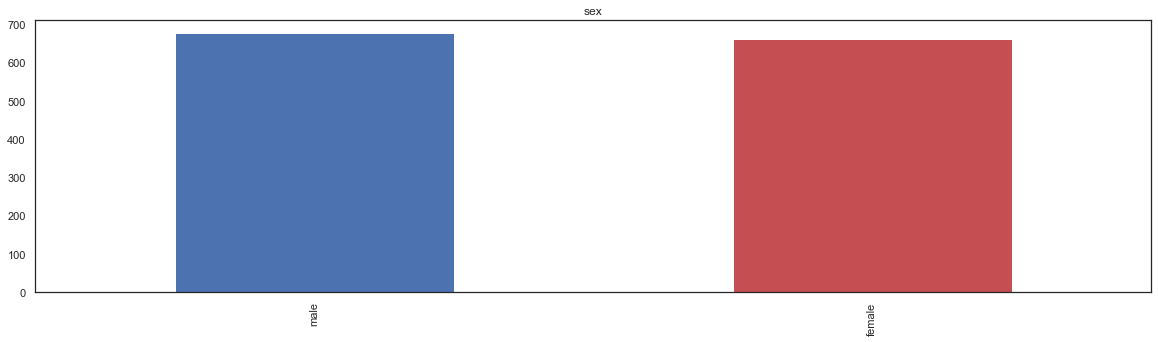

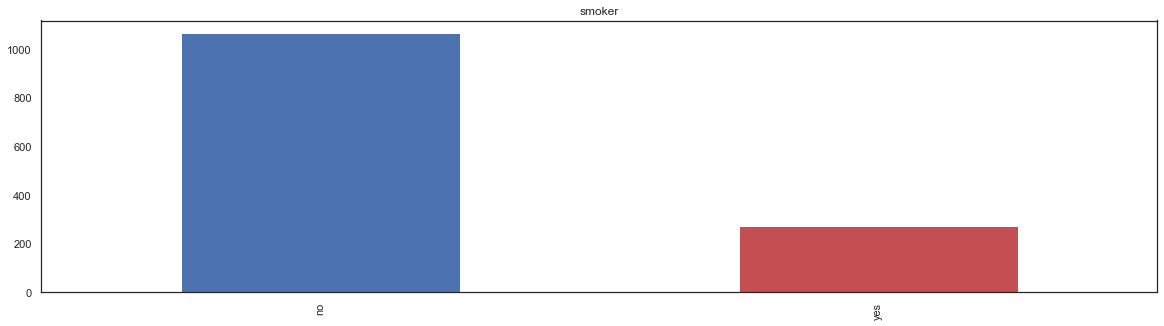

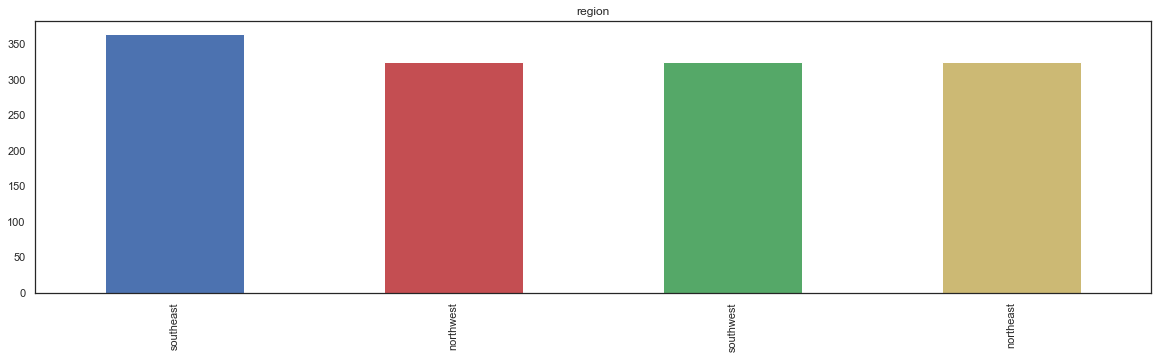

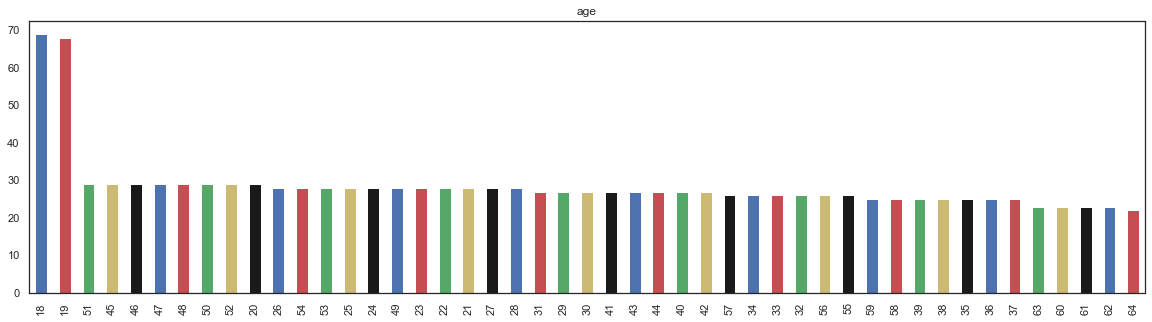

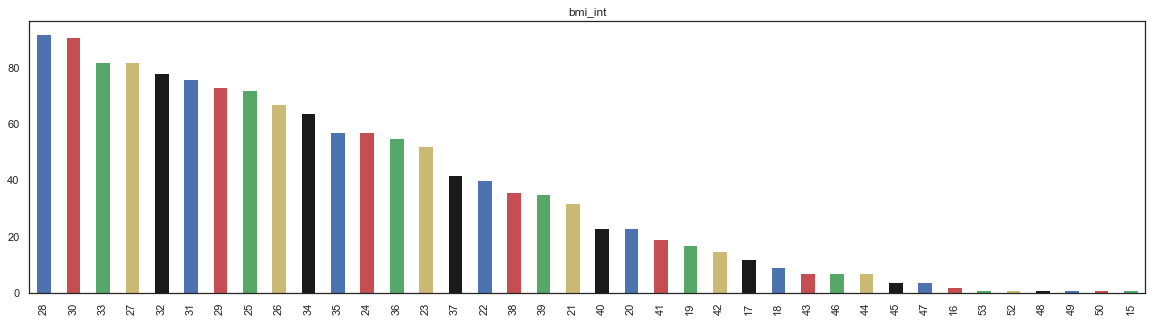

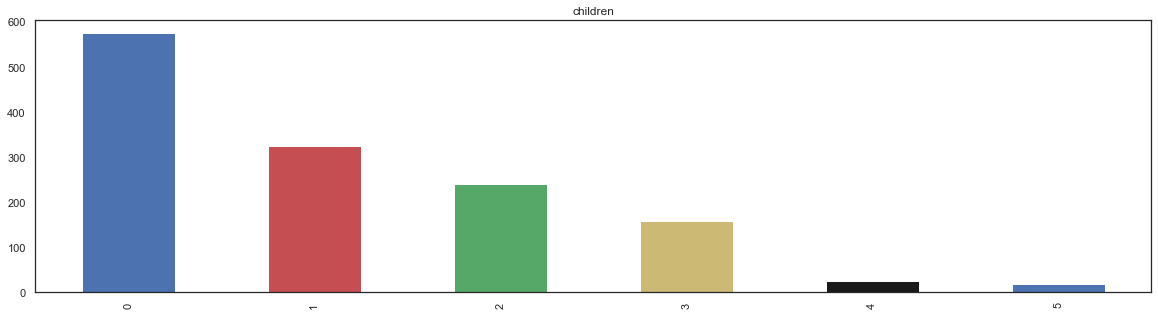

In [9]:
variables = ['sex','smoker','region','age','bmi_int','children']

print('Data distribution analysis')
for v in variables:
    # Create a list of colors to cycle through in the visualizations.
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df[v])))
    # Set the figure size.
    plt.figure(figsize=(20,5))
    # Now sort the values in each column.
    df = df.sort_values(by=[v])
    # Finally, plot bar graphs of each column's values.
    df[v].value_counts()\
        .plot(kind = 'bar',
              color=my_colors)
    plt.title(v)
    plt.show()

#### We sorted the values, so let's peek at the head and tail of the dataframe.

In [10]:
df.head().append(df.tail())

,age,sex,bmi,children,smoker,region,charges,bmi_int
172,18,male,15.960,0,no,northeast,1694.79640,15
513,19,male,30.400,0,no,southwest,1256.29900,30
195,19,male,30.590,0,no,northwest,1639.56310,30
1049,49,male,30.900,0,yes,southwest,39727.61400,30
171,49,male,30.300,0,no,southwest,8116.68000,30
937,39,female,24.225,5,no,northwest,8965.79575,24
640,33,male,42.400,5,no,southwest,6666.24300,42
1272,43,male,25.520,5,no,southeast,14478.33015,25
438,52,female,46.750,5,no,southeast,12592.53450,46
425,45,male,24.310,5,no,southeast,9788.86590,24


#### And at a sample...

In [11]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges,bmi_int
221,53,female,33.250,0,no,northeast,10564.88450,33
270,18,male,29.370,1,no,southeast,1719.43630,29
514,39,male,28.300,1,yes,southwest,21082.16000,28
959,48,male,36.670,1,no,northwest,28468.91901,36
1190,31,female,32.775,2,no,northwest,5327.40025,32
402,64,female,32.965,0,no,northwest,14692.66935,32
1051,64,male,26.410,0,no,northeast,14394.55790,26
1053,47,male,29.800,3,yes,southwest,25309.48900,29
653,45,female,36.300,2,no,southeast,8527.53200,36
952,30,female,28.405,1,no,northwest,4527.18295,28


#### Now let's look at the average cost per feature value.

Mean cost analysis:


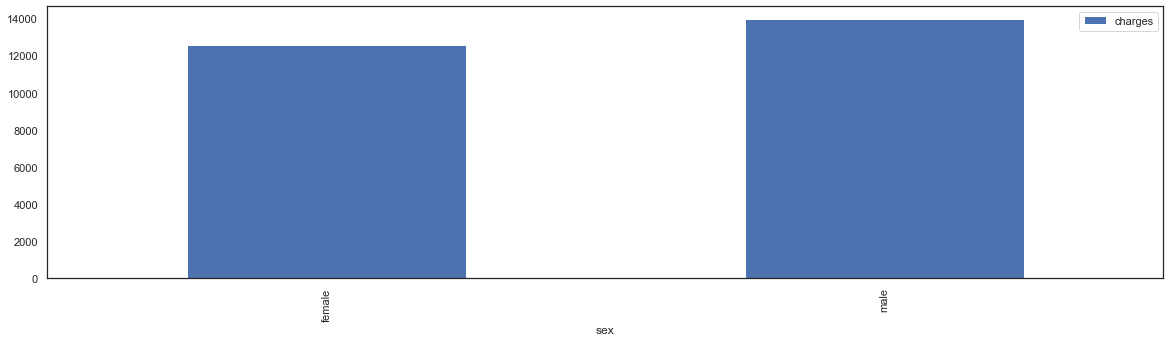

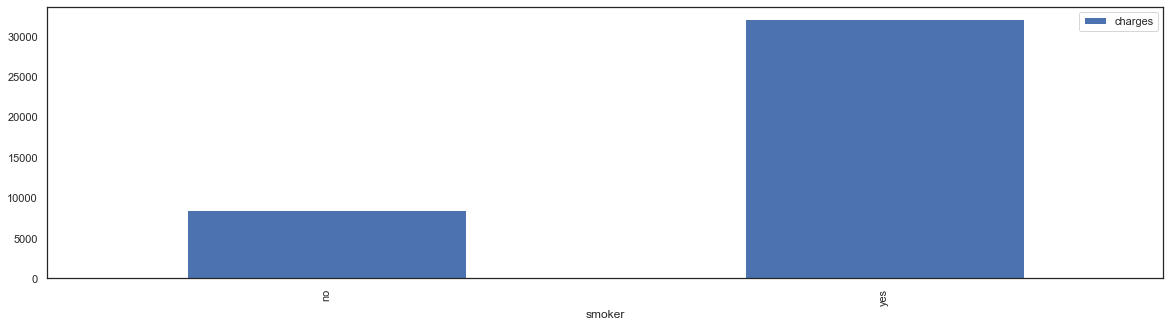

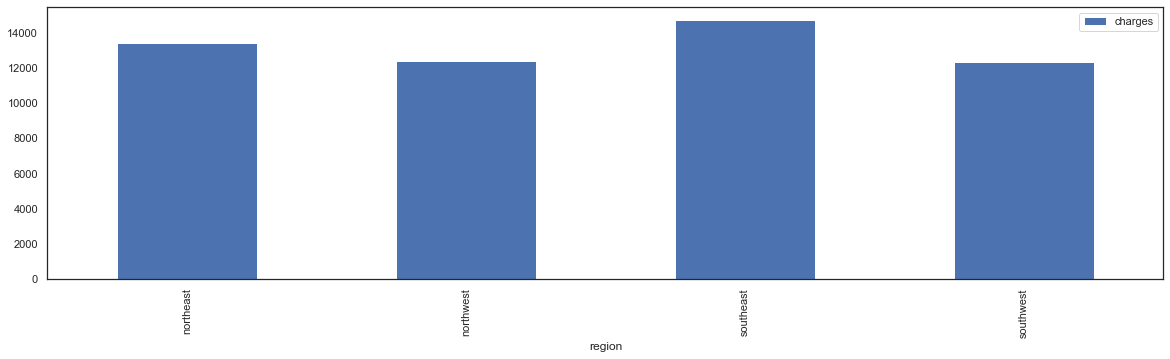

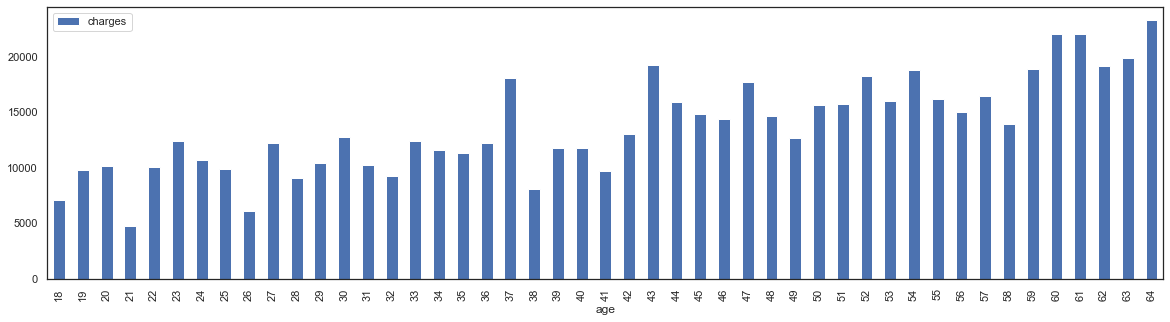

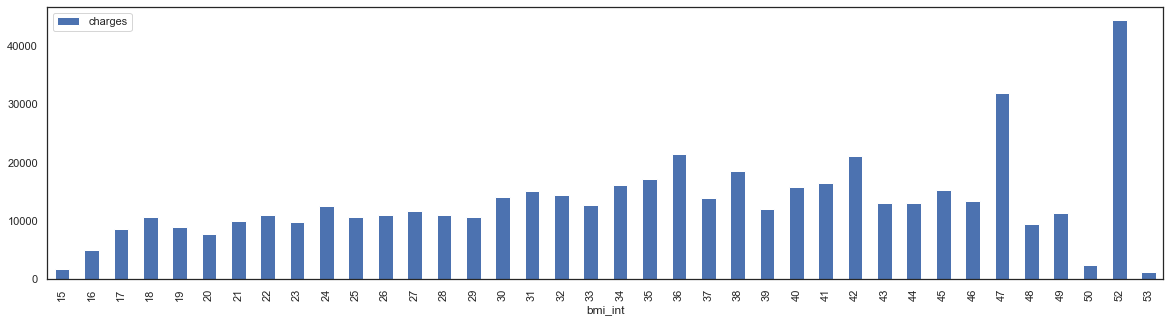

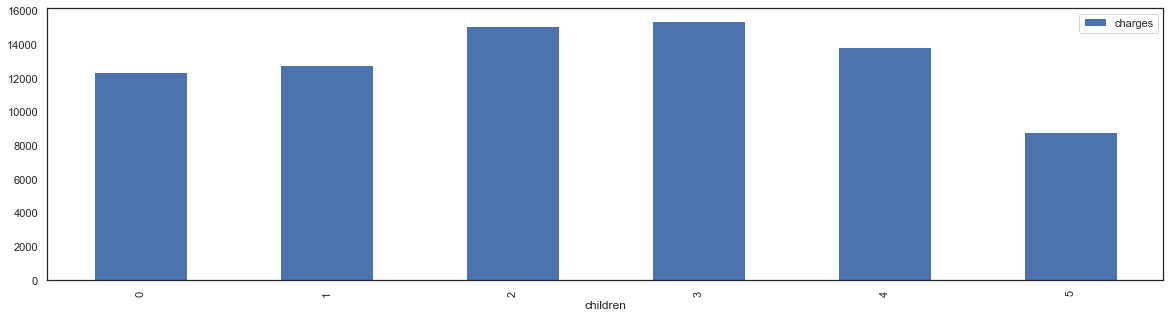

In [12]:
print('Mean cost analysis:')
for v in variables:
    group_df = df.groupby(pd.Grouper(key=v)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y = ['charges'],kind = 'bar', figsize=(20,5))
    plt.show()

- Men average a little bit higher charges than women.
- Smokers average a lot more than non-smokers.
- Regions don't really vary.
- Charges trend up with age.
- Need to look more carefully at bmi. Charges sort of trend up as bmi increases, but then the last four markers are really odd.
- Not much difference between numbers of children except five is significantly less.

#### Let's look at a pairs plot. It will allow us to see both the distribution of single variables as well as the relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis.

Variables pairplot:


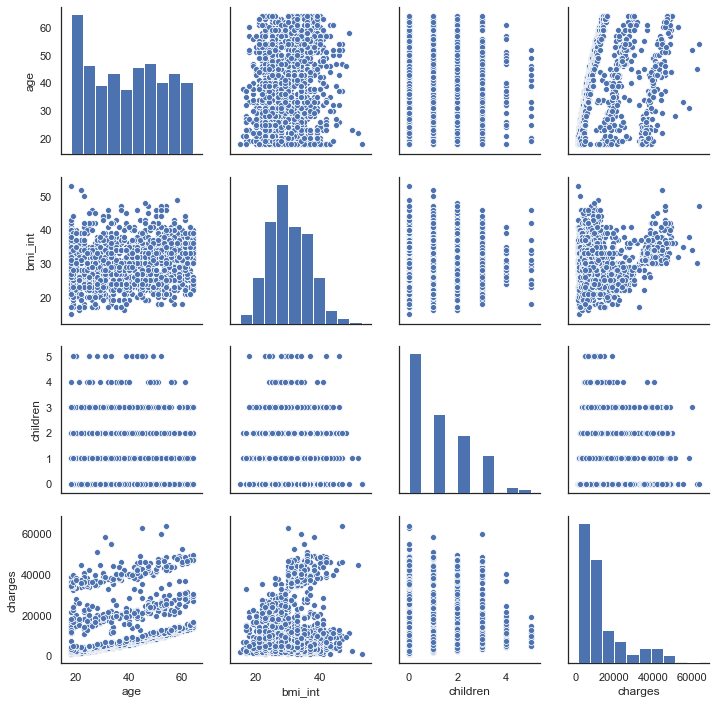

In [13]:
print('Variables pairplot:')
variables = ['sex','smoker','region','age','bmi_int','children','charges']
sns_plot = sns.pairplot(df[variables])
plt.show()

- Age shows three distinct tiers of linear relationships with charges.
- Charges are pretty similar for 0-3 children, but drop off for 4 and especially 5.
- Max bmi drops as the number of children increases until 5 children.

#### We need to transform the categorical data and then store it back in the df dataframe.

In [14]:
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])
df['region'] = le_region.fit_transform(df['region'])

df.head().append(df.tail())

,age,sex,bmi,children,smoker,region,charges,bmi_int
172,18,1,15.960,0,0,0,1694.79640,15
513,19,1,30.400,0,0,3,1256.29900,30
195,19,1,30.590,0,0,1,1639.56310,30
1049,49,1,30.900,0,1,3,39727.61400,30
171,49,1,30.300,0,0,3,8116.68000,30
937,39,0,24.225,5,0,1,8965.79575,24
640,33,1,42.400,5,0,3,6666.24300,42
1272,43,1,25.520,5,0,2,14478.33015,25
438,52,0,46.750,5,0,2,12592.53450,46
425,45,1,24.310,5,0,2,9788.86590,24


#### Now let's split the data into train and test sets and run our regressor model.

In [15]:
variables = ['sex','smoker','region','age','bmi','children']

X = df[variables]
# scale the data
sc = StandardScaler()
X = sc.fit_transform(X) 
Y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#### Let's train our model and evaluate it. We will use an "extra-trees regressor."

#### This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [16]:
# create model
regressor = ExtraTreesRegressor(n_estimators = 200)
# fit model
regressor.fit(X_train,y_train)

# use model to obtain predictions and then evaluate the predictions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('ExtraTreesRegressor evaluating result:')
print()
print("The mean of the train:", y_train.mean())
print("The median of the train:", y_train.median())
print("Train MAE: ", sklearn.metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_train, y_train_pred)))
print("mean/RMSE:", y_train.mean()/np.sqrt(sklearn.metrics.mean_squared_error(y_train, y_train_pred)))

print()
print("The mean of the test:", y_test.mean())
print("The median of the test:", y_test.median())
print("Test MAE: ", sklearn.metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_test_pred)))
print("mean/RMSE:", y_test.mean()/np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

ExtraTreesRegressor evaluating result:

The mean of the train: 13520.43782399907
The median of the train: 9556.297050000001
Train MAE:  11.683379953302845
Train RMSE:  270.2373612509658
mean/RMSE: 50.031711978725326

The mean of the test: 12272.225817462686
The median of the test: 8372.318224999999
Test MAE:  2678.2930392964536
Test RMSE:  4988.243246645272
mean/RMSE: 2.4602300270172446


#### Now let's rank the importance of each feature using regressor.feature_importances.

Feature importance ranking


1.smoker(0.611938)
2.bmi(0.193805)
3.age(0.134115)
4.children(0.026561)
5.region(0.022413)
6.sex(0.011168)


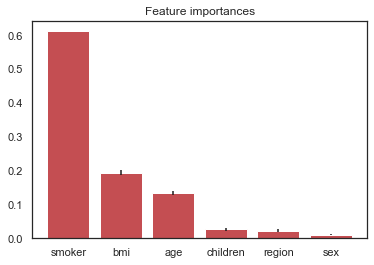

In [17]:
print('Feature importance ranking\n\n')
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="r", yerr=std[indices], align="center")
plt.show()

#### So whether a person smoked or not is by far the most important feature in predicting the insurance rates.
#### BMI drops off in importance, but is second.
#### And age is third.

#### Let's show some examples of predicting insurance rates on fictitious characters. Recall the ranges in values for each feature (note they have been encoded).

In [18]:
for col in df:
    print(col)
    print(df[col].min(), ' - ', df[col].max())
    print()

age
18  -  64

sex
0  -  1

bmi
15.96  -  53.13

children
0  -  5

smoker
0  -  1

region
0  -  3

charges
1121.8739  -  63770.42801

bmi_int
15  -  53



In [19]:
print('Predicting insurance rates on new fictitious characters:\n\n')

# Recall that the order of our variables is 
# ['sex','smoker','region','age','bmi','children']

# Create a character named Rock.
Rock = ['male','yes','southwest',25,30.5,2]
print('Rock - ')
print('\tsex:', Rock[0])
print('\tsmoker:', Rock[1])
print('\tregion:', Rock[2])
print('\tage:', Rock[3])
print('\tbmi:', Rock[4])
print('\tchildren:', Rock[5])
print()

# Transform the string data into numeric.
Rock[0] = le_sex.transform([Rock[0]])[0] 
Rock[1] = le_smoker.transform([Rock[1]])[0] 
Rock[2] = le_region.transform([Rock[2]])[0] 

# Scale the data using the StandardScaler() we previously created.
X = sc.transform([Rock])

# Predict the cost for Rock using the extra trees regressor we previously created.
cost_for_Rock = regressor.predict(X)[0]
print('Cost for Rock = $',cost_for_Rock,'\n\n')


Rockette = ['female','no','southeast',45,19,0]
print('Rockette - ')
print('\tsex:', Rockette[0])
print('\tsmoker:', Rockette[1])
print('\tregion:', Rockette[2])
print('\tage:', Rockette[3])
print('\tbmi:', Rockette[4])
print('\tchildren:', Rockette[5])
print()

# Transform the string data into numeric.
Rockette[0] = le_sex.transform([Rockette[0]])[0] 
Rockette[1] = le_smoker.transform([Rockette[1]])[0] 
Rockette[2] = le_region.transform([Rockette[2]])[0] 

# Scale the data using the StandardScaler() we previously created.
X = sc.transform([Rockette])

# Predict the cost for Rock using the extra trees regressor we previously created.
cost_for_Rockette = regressor.predict(X)[0]
print('Cost for Rockette = $',cost_for_Rockette, '\n\n')


FertileRockette = ['female','no','southeast',45,19,5]
print('FertileRockette - ')
print('\tsex:', FertileRockette[0])
print('\tsmoker:', FertileRockette[1])
print('\tregion:', FertileRockette[2])
print('\tage:', FertileRockette[3])
print('\tbmi:', FertileRockette[4])
print('\tchildren:', FertileRockette[5])
print()

# Transform the string data into numeric.
FertileRockette[0] = le_sex.transform([FertileRockette[0]])[0] 
FertileRockette[1] = le_smoker.transform([FertileRockette[1]])[0] 
FertileRockette[2] = le_region.transform([FertileRockette[2]])[0] 

# Scale the data using the StandardScaler() we previously created.
X = sc.transform([FertileRockette])

# Predict the cost for Rock using the extra trees regressor we previously created.
cost_for_FertileRockette = regressor.predict(X)[0]
print('Cost for FertileRockette = $',cost_for_FertileRockette)

Predicting insurance rates on new fictitious characters:


Rock - 
	sex: male
	smoker: yes
	region: southwest
	age: 25
	bmi: 30.5
	children: 2

Cost for Rock = $ 33290.30213599996 


Rockette - 
	sex: female
	smoker: no
	region: southeast
	age: 45
	bmi: 19
	children: 0

Cost for Rockette = $ 8792.944536500003 


FertileRockette - 
	sex: female
	smoker: no
	region: southeast
	age: 45
	bmi: 19
	children: 5

Cost for FertileRockette = $ 10889.239372650003


Thank you to the following tutorial:
https://www.kaggle.com/flagma/health-care-cost-analysys-prediction-python/data